<a href="https://colab.research.google.com/github/Hruthikaveldi/hackathon_T186/blob/main/Fake_account_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ipywidgets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.5 MB/s eta 0:00:00


In [ ]:
!jupyter nbextension enable --py widgetsnbextension


Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json


In [ ]:
#import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:

# Simulating a dataset: 1 = Fake account, 0 = Genuine account

data = {
    'account_age_years': [0.5, 3, 1, 0.2, 4, 2.5, 0.3, 5, 0.1, 3.5, 2, 1.5],
    'num_posts': [5, 300, 10, 3, 500, 200, 2, 700, 1, 450, 150, 60],
    'followers': [10, 500, 30, 5, 800, 400, 8, 1000, 2, 600, 300, 100],
    'following': [200, 400, 150, 300, 300, 250, 400, 500, 1000, 350, 180, 170],
    'has_profile_pic': [0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1],
    'engagement_rate': [0.02, 0.4, 0.1, 0.01, 0.5, 0.3, 0.01, 0.6, 0.005, 0.45, 0.25, 0.15],
    'label': [1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0]  # 1 = Fake, 0 = Genuine
}

df = pd.DataFrame(data)
df.head()


,account_age_years,num_posts,followers,following,has_profile_pic,engagement_rate,label
0,0.5,5,10,200,0,0.02,1
1,3.0,300,500,400,1,0.40,0
2,1.0,10,30,150,0,0.10,1
3,0.2,3,5,300,0,0.01,1
4,4.0,500,800,300,1,0.50,0


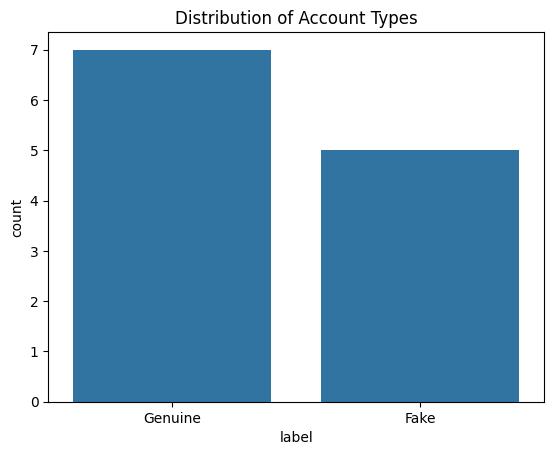

In [ ]:
# Visualize distribution
sns.countplot(data=df, x='label')
plt.xticks([0,1], ['Genuine', 'Fake'])
plt.title("Distribution of Account Types")
plt.show()


In [ ]:
# Features and Target
X = df.drop('label', axis=1)
y = df['label']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)


In [ ]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred_lr = log_reg.predict(X_test)

print("🔐 Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))


🔐 Logistic Regression Results:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [ ]:
# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("🌲 Random Forest Classifier Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


🌲 Random Forest Classifier Results:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



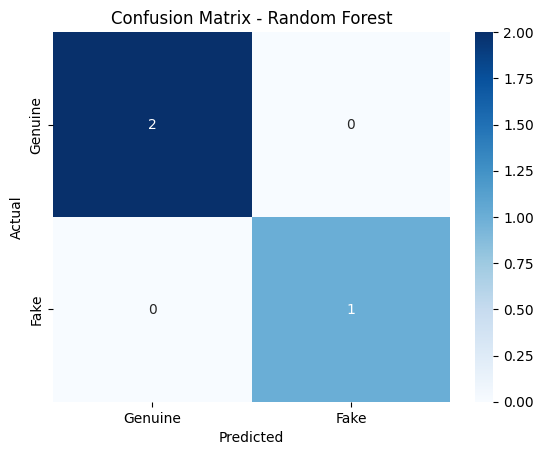

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Genuine', 'Fake'], yticklabels=['Genuine', 'Fake'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()


In [ ]:
import ipywidgets as widgets
from IPython.display import display
import numpy as np

def check_fake_account_widgets():
    # Widgets
    account_age = widgets.FloatText(description="Account Age (yrs):")
    num_posts = widgets.IntText(description="Posts:")
    followers = widgets.IntText(description="Followers:")
    following = widgets.IntText(description="Following:")
    # Changed dropdown options to numerical values
    has_profile_pic = widgets.Dropdown(options=[(1, 1), (0, 0)], description="Profile Pic:")
    engagement_rate = widgets.FloatSlider(description="Engagement", min=0, max=1, step=0.01)

    button = widgets.Button(description="Check Account", button_style="danger")

    input_widgets = widgets.VBox([account_age, num_posts, followers, following, has_profile_pic, engagement_rate, button])
    display(input_widgets)

    def on_click(b):
        new_account = np.array([[account_age.value, num_posts.value, followers.value, following.value, has_profile_pic.value, engagement_rate.value]])
        new_account_scaled = scaler.transform(new_account)
        pred = rf_model.predict(new_account_scaled)

        reasons = []
        if account_age.value < 1:
            reasons.append("Very new account")
        if num_posts.value < 10:
            reasons.append("Very few posts")
        if followers.value < 20:
            reasons.append("Low follower count")
        if has_profile_pic.value == 0:
            reasons.append("Missing profile picture")
        if engagement_rate.value < 0.05:
            reasons.append("Low engagement rate")
        if following.value > 300 and followers.value < 50:
            reasons.append("Following many but has few followers")

        if pred[0] == 1:
            print("\n🚨 WARNING! This is likely a **FAKE ACCOUNT** ❌")
            print("📌 Reasons detected:")
            for r in reasons:
                print(f" - {r}")
        else:
            print("\n✅ This is a **GENUINE ACCOUNT** 🟢")

    button.on_click(on_click)

# Call the function
check_fake_account_widgets()






🚨 WARNING! This is likely a **FAKE ACCOUNT** ❌
📌 Reasons detected:
 - Very few posts
 - Low follower count
 - Missing profile picture


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
from IPython.display import Markdown as md

md("""
###  **Conclusion**
- We successfully built a basic machine learning model to detect **fake social media accounts**.
- The **Random Forest classifier** gave better accuracy and handles noisy data better.
- This can be extended by:
  - Using real-time data (Twitter API)
  - Adding NLP for profile bio and post content
  - Implementing bot detection based on time-interval posting

> This project contributes to **Cybersecurity** by defending social media ecosystems from spam, fake news, scams, and bot-driven attacks.
""")



###  **Conclusion**
- We successfully built a basic machine learning model to detect **fake social media accounts**.
- The **Random Forest classifier** gave better accuracy and handles noisy data better.
- This can be extended by:
  - Using real-time data (Twitter API)
  - Adding NLP for profile bio and post content
  - Implementing bot detection based on time-interval posting
  
> This project contributes to **Cybersecurity** by defending social media ecosystems from spam, fake news, scams, and bot-driven attacks.
